In [18]:
from fastai.vision import *

In [19]:
# path = Path('data/mydata')
path = Path('data/mymumap')

In [20]:
np.random.seed(42)
tfms = get_transforms()
data = (ImageList.from_folder(path/'data1')
        .split_by_rand_pct(0.2)         
        .label_from_folder()
        .transform(tfms, size=38)
        .databunch()
        .normalize(imagenet_stats)) 

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['air', 'bone', 'brain'], 3, 2400, 600)

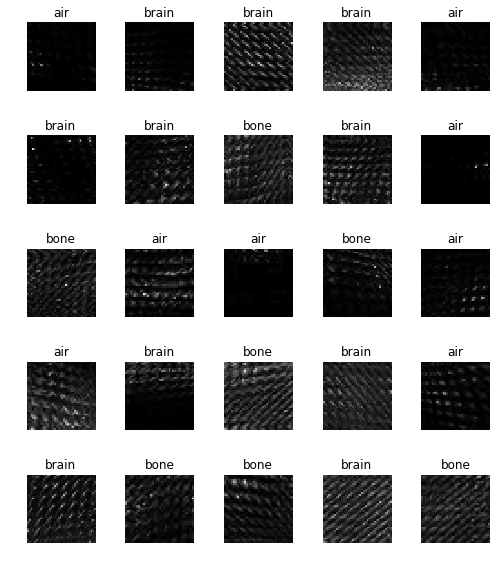

In [17]:
data.show_batch(rows=5, figsize=(7,8))

## Train model

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


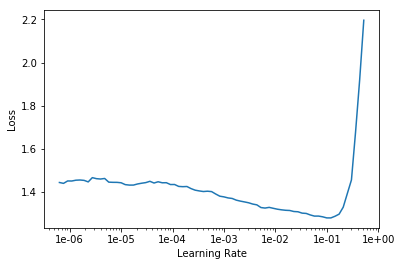

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
lr = 1e-3 #the steepest
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.268608,0.925687,0.446667,00:03
1,1.167218,0.887230,0.410000,00:03
2,1.082634,0.870613,0.416667,00:03
3,1.057385,0.859734,0.408333,00:03


In [25]:
learn.save('stage-1')

In [26]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


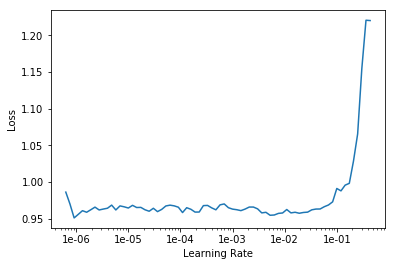

In [30]:
learn.lr_find()
learn.recorder.plot()

In [28]:
# learn.fit_one_cycle(2, max_lr=slice(1e-6,5e-4))

In [31]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.952789,0.820837,0.363333,00:03
1,0.960977,0.815163,0.361667,00:03
2,0.934920,0.810199,0.373333,00:03
3,0.930860,0.799183,0.371667,00:03
4,0.919774,0.802660,0.361667,00:03


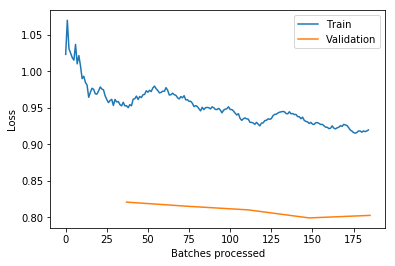

In [32]:
learn.recorder.plot_losses()

In [34]:
learn.save('stage-2')

In [35]:
# # go big
# data = (src.transform(tfms, size=256)
#         .databunch().normalize(imagenet_stats))
# learn.data = data
# # then train again

## Interpretation

In [36]:
learn.load('stage-2');

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

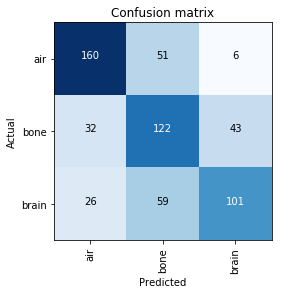

In [38]:
interp.plot_confusion_matrix()

## Putting your model in production
https://docs.fast.ai/tutorial.inference.html

In [39]:
learn.export()

In [40]:
defaults.device = torch.device('cpu')

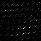

In [41]:
img = open_image(path/'data1'/'brain'/'brain_patch_80.jpg')
img

In [42]:
pred_class,_,_ = learn.predict(img)
pred_class

Category air

In [43]:
learn = load_learner(path, test=ImageList.from_folder(path/'test'))
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
# preds[:5]

FileNotFoundError: [Errno 2] No such file or directory: 'data/mymumap/export.pkl'

In [74]:
thresh = 0.5
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
labelled_preds[:5]

NameError: name 'preds' is not defined

In [75]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv(path/'submission.csv', index=False)

AttributeError: 'NoneType' object has no attribute 'items'